## Import Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df = pd.read_csv('../input/credit_risk_dataset.csv')
df.head().T

,0,1,2,3,4
person_age,22,21,25,23,24
person_income,59000,9600,9600,65500,54400
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
person_emp_length,123,5,1,4,8
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_grade,D,B,C,C,C
loan_amnt,35000,1000,5500,35000,35000
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_status,1,0,1,1,1
loan_percent_income,0.59,0.1,0.57,0.53,0.55


#### Brief Summary

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32581,NaN,NaN,NaN,27.7346,6.34808,20,23,26,30,144
person_income,32581,NaN,NaN,NaN,66074.8,61983.1,4000,38500,55000,79200,6e+06
person_home_ownership,32581,4,RENT,16446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,31686,NaN,NaN,NaN,4.78969,4.14263,0,2,4,7,123
loan_intent,32581,6,EDUCATION,6453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,32581,7,A,10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,32581,NaN,NaN,NaN,9589.37,6322.09,500,5000,8000,12200,35000
loan_int_rate,29465,NaN,NaN,NaN,11.0117,3.24046,5.42,7.9,10.99,13.47,23.22
loan_status,32581,NaN,NaN,NaN,0.218164,0.413006,0,0,0,0,1
loan_percent_income,32581,NaN,NaN,NaN,0.170203,0.106782,0,0.09,0.15,0.23,0.83


#### Get field types - Continuous or Categorical

In [4]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [5]:

continuous_columns  = [i for i,j in zip(df.columns,df.dtypes) if j in ['int64','float64']]
categorical_columns = set(df.columns) - set(continuous_columns)
    

#### Univariate Analysis - Plotting Histograms

Histogram of  person_age


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

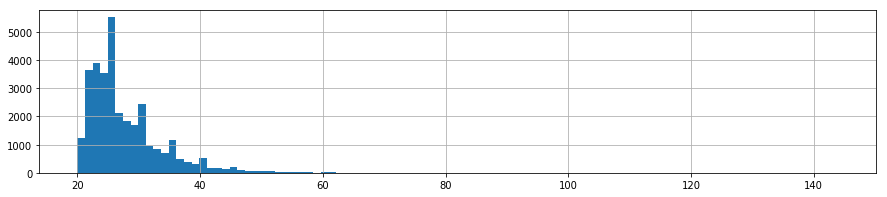

Histogram of  person_income


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

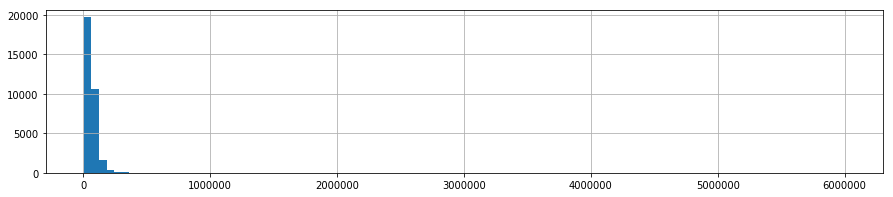

Histogram of  person_emp_length


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

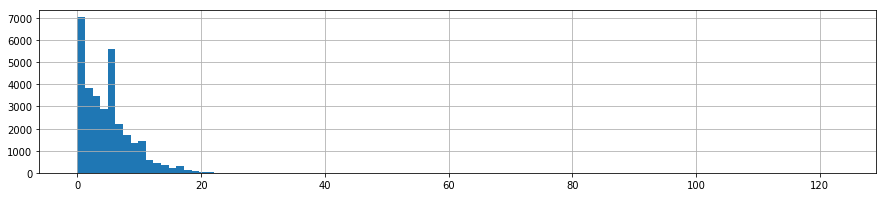

Histogram of  loan_amnt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

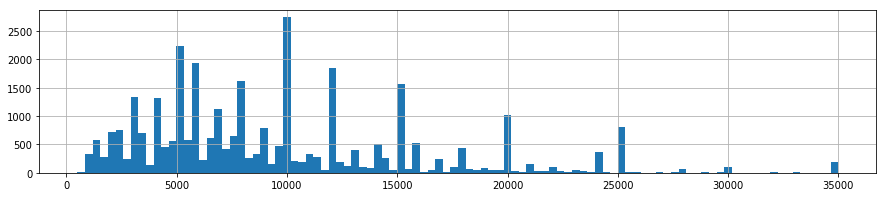

Histogram of  loan_int_rate


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

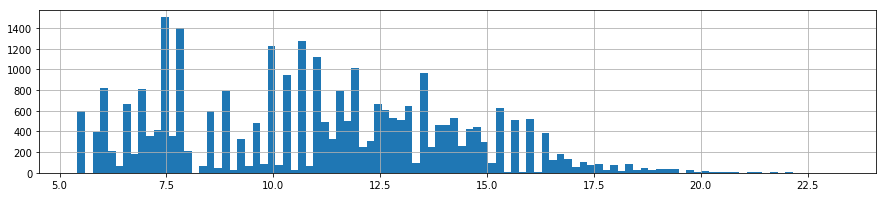

Histogram of  loan_status


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

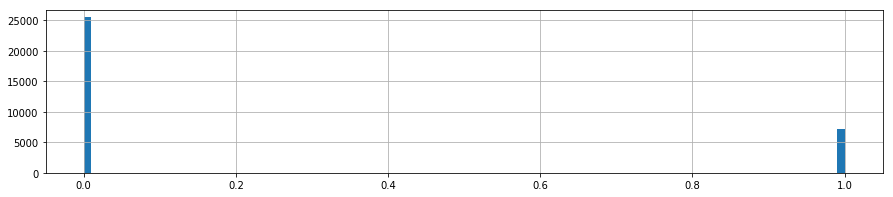

Histogram of  loan_percent_income


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

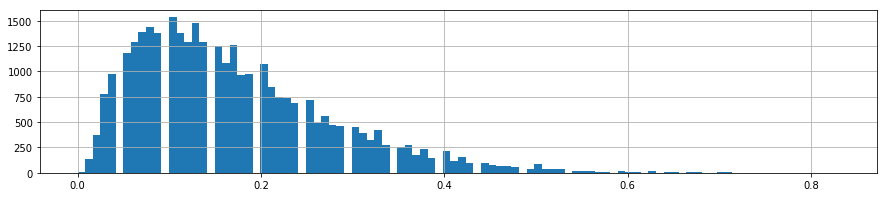

Histogram of  cb_person_cred_hist_length


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

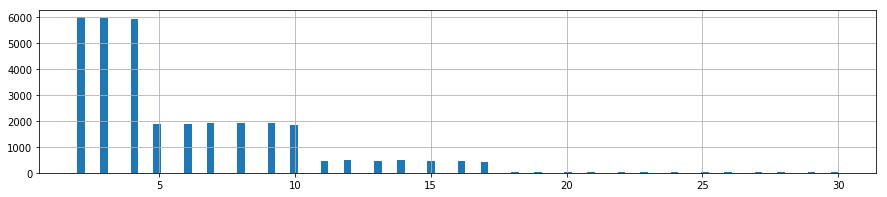

In [6]:
for col in continuous_columns:
    print('Histogram of ', col)
    plt.figure(figsize=(15,3))
    df[col].hist(bins=100)
    plt.show()

#### Removing Outliers based on Histograms

In [7]:
df = df.query('person_age<60 and person_income<300000 and person_emp_length<25 and loan_percent_income<0.7')


Histogram of  person_age


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

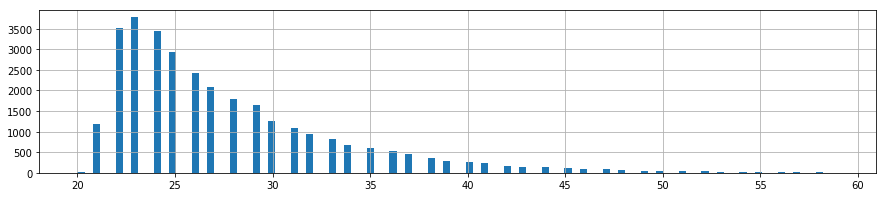

Histogram of  person_income


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

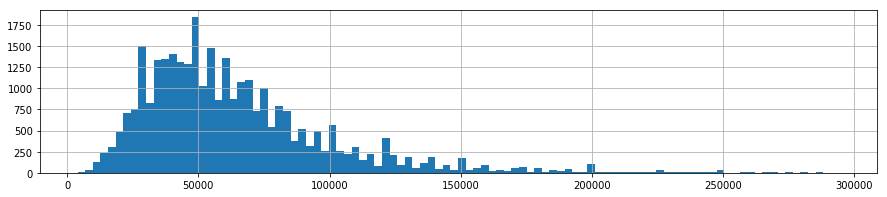

Histogram of  person_emp_length


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

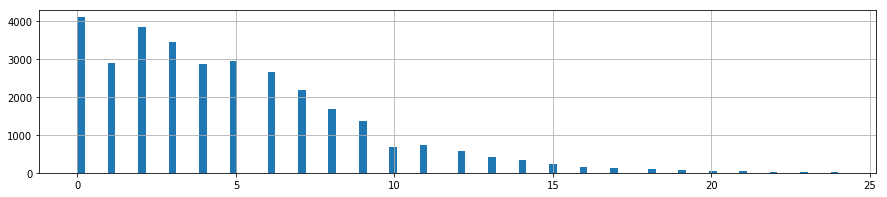

Histogram of  loan_amnt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

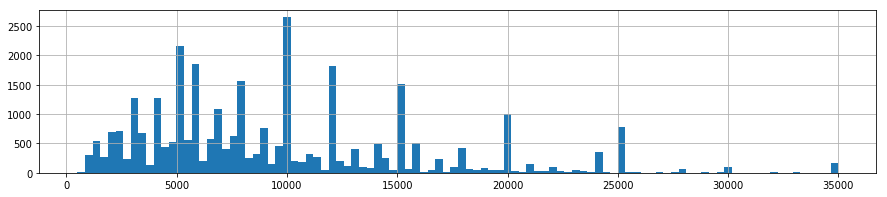

Histogram of  loan_int_rate


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

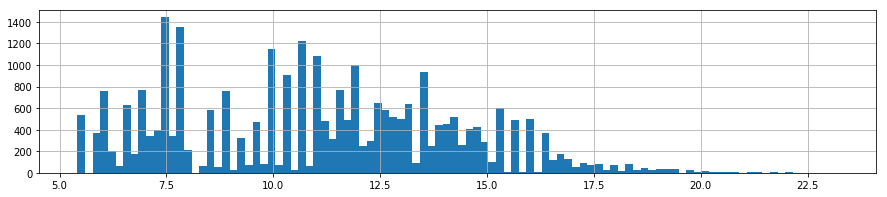

Histogram of  loan_status


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

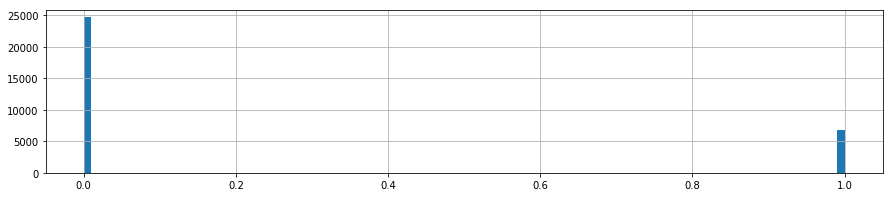

Histogram of  loan_percent_income


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

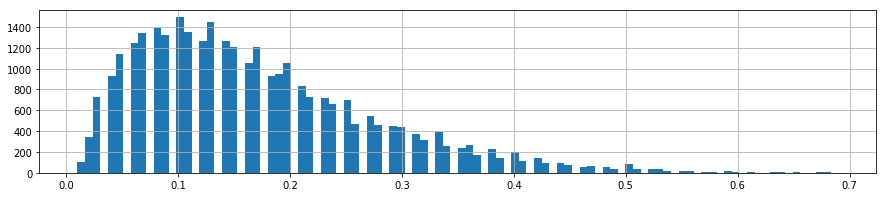

Histogram of  cb_person_cred_hist_length


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

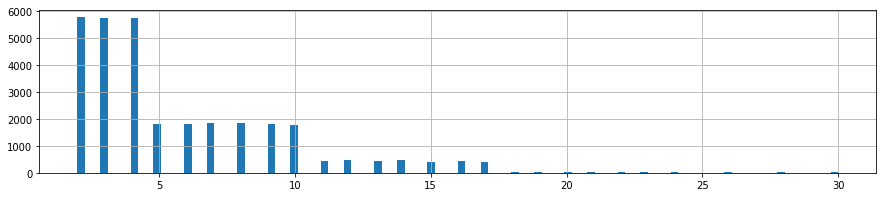

In [8]:
for col in continuous_columns:
    print('Histogram of ', col)
    plt.figure(figsize=(15,3))
    df[col].hist(bins=100)
    plt.show()

#### Find and Impute Missing values

In [9]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3018
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

- Find values to impute based on custom logic (based on business idea)

In [10]:
impute_loan_int_rate = df[['loan_intent','loan_grade','loan_int_rate']].groupby(['loan_intent','loan_grade']).mean().reset_index()
impute_loan_int_rate.head(15)

,loan_intent,loan_grade,loan_int_rate
0,DEBTCONSOLIDATION,A,7.354764
1,DEBTCONSOLIDATION,B,11.005967
2,DEBTCONSOLIDATION,C,13.457867
3,DEBTCONSOLIDATION,D,15.366730
4,DEBTCONSOLIDATION,E,17.008306
5,DEBTCONSOLIDATION,F,18.572432
6,DEBTCONSOLIDATION,G,20.332500
7,EDUCATION,A,7.382525
8,EDUCATION,B,11.002287
9,EDUCATION,C,13.413205


In [11]:
def find_value_of_loan_int_rate_for_imputation(loan_intent, loan_grade):
    value = impute_loan_int_rate[impute_loan_int_rate['loan_intent']==loan_intent][impute_loan_int_rate['loan_grade']==loan_grade]['loan_int_rate'].values[0]
    return value

find_value_of_loan_int_rate_for_imputation('HOMEIMPROVEMENT', 'A')
    

7.281009081735596

In [12]:

print('\nSummary before imputation\n',df['loan_int_rate'].describe())

df['loan_int_rate'] = [find_value_of_loan_int_rate_for_imputation(i, j) if str(k)=='nan' else k for i,j,k in zip(df['loan_intent'], df['loan_grade'],df['loan_int_rate'])]

print('\nSummary after imputation\n',df['loan_int_rate'].describe())



Summary before imputation
 count    28382.000000
mean        11.035418
std          3.228913
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

Summary after imputation
 count    31400.000000
mean        11.033668
std          3.207706
min          5.420000
25%          7.900000
50%         11.002287
75%         13.457867
max         23.220000
Name: loan_int_rate, dtype: float64


#### One-Hot Encoding of Categorical Values

In [13]:
df = pd.get_dummies(data=df, columns=['loan_grade','cb_person_default_on_file','loan_intent','person_home_ownership'], drop_first=True)
df.head().T

,1,2,3,4,5
person_age,21.00,25.00,23.00,24.00,21.00
person_income,9600.00,9600.00,65500.00,54400.00,9900.00
person_emp_length,5.00,1.00,4.00,8.00,2.00
loan_amnt,1000.00,5500.00,35000.00,35000.00,2500.00
loan_int_rate,11.14,12.87,15.23,14.27,7.14
loan_status,0.00,1.00,1.00,1.00,1.00
loan_percent_income,0.10,0.57,0.53,0.55,0.25
cb_person_cred_hist_length,2.00,3.00,2.00,4.00,2.00
loan_grade_B,1.00,0.00,0.00,0.00,0.00
loan_grade_C,0.00,1.00,1.00,1.00,0.00


#### Normalize dataframe

In [14]:
normalized_df = (df-df.min())/(df.max()-df.min())
normalized_df.head().T

,1,2,3,4,5
person_age,0.025641,0.128205,0.076923,0.102564,0.025641
person_income,0.019310,0.019310,0.212069,0.173793,0.020345
person_emp_length,0.208333,0.041667,0.166667,0.333333,0.083333
loan_amnt,0.014493,0.144928,1.000000,1.000000,0.057971
loan_int_rate,0.321348,0.418539,0.551124,0.497191,0.096629
loan_status,0.000000,1.000000,1.000000,1.000000,1.000000
loan_percent_income,0.132353,0.823529,0.764706,0.794118,0.352941
cb_person_cred_hist_length,0.000000,0.035714,0.000000,0.071429,0.000000
loan_grade_B,1.000000,0.000000,0.000000,0.000000,0.000000
loan_grade_C,0.000000,1.000000,1.000000,1.000000,0.000000


#### Plot Corelation amoung all columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

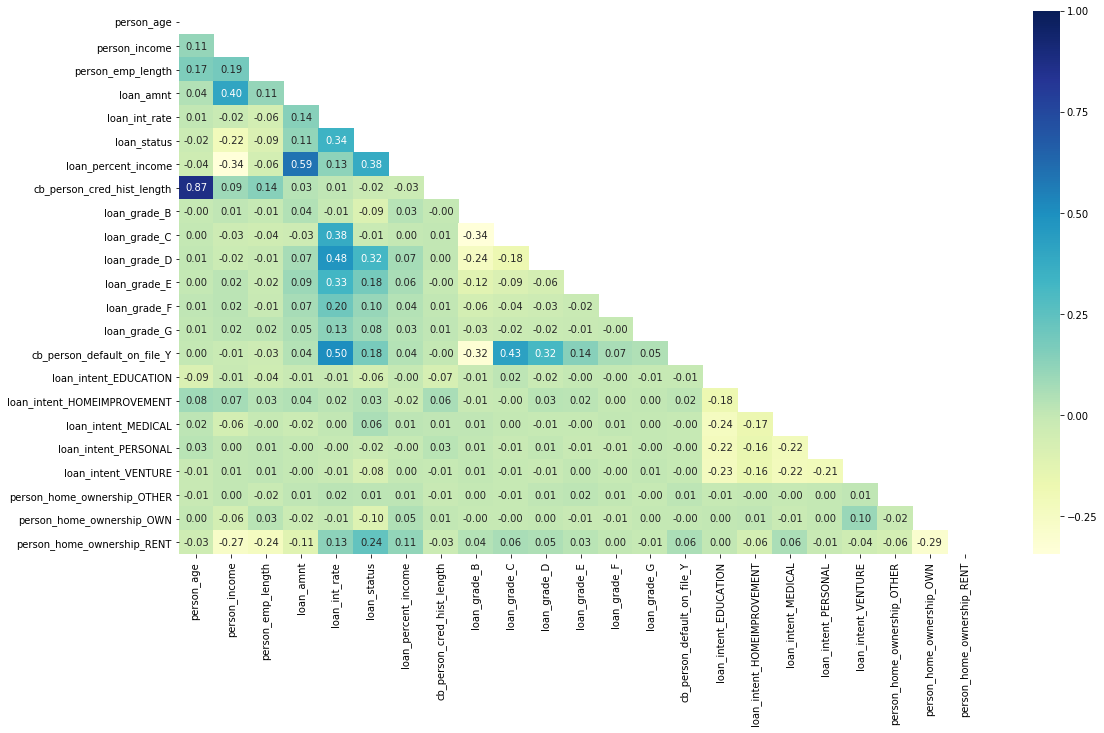

In [15]:

plt.figure(figsize=(18,10))
corr_ = normalized_df.corr()
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(corr_, mask=mask, annot=True, fmt='.2f',  cmap="YlGnBu")
plt.show()

#### Find class distribution

In [16]:
cls = pd.DataFrame(normalized_df.groupby('loan_status').count()['person_age'])
cls.columns = ['count']
cls['precentage'] = round(100*cls['count']/sum(cls['count']),2)
cls

,count,precentage
loan_status,,
0.0,24625,78.42
1.0,6775,21.58


#### Prepare dataset for Training and Validation

In [17]:

X, y = df.drop(columns='loan_status'), df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)


#### Try Logistic Regression

In [18]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred),
     '\n',
     classification_report(y_test, y_pred))

[[4834   91]
 [1136  219]] 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      4925
           1       0.71      0.16      0.26      1355

    accuracy                           0.80      6280
   macro avg       0.76      0.57      0.58      6280
weighted avg       0.79      0.80      0.75      6280



#### Try XGBoost Classifier

In [19]:
xgb = XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred),
     '\n',
     classification_report(y_test, y_pred))

[[4865   60]
 [ 411  944]] 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4925
           1       0.94      0.70      0.80      1355

    accuracy                           0.93      6280
   macro avg       0.93      0.84      0.88      6280
weighted avg       0.93      0.93      0.92      6280



#### Parameter tuning to find better solutions

In [ ]:
clf = XGBClassifier()

param_grid = {
                'silent'       : [False],
                'max_depth'    : [3,5,8],
                'learning_rate': [ 0.1, 0.2, 0,3],
                'subsample'    : [0.5, 0.75, 1.0],
                'n_estimators' : [100, 500]
             }

rs_clf = RandomizedSearchCV(clf, 
                            param_grid, 
                            n_iter=20,
                            n_jobs=1, 
                            verbose=2, 
                            cv=2,
                            scoring='neg_log_loss', 
                            refit=False, 
                            random_state=42).fit(X_train, y_train)

print('Best parameters = ', rs_clf.best_params)


#### Check improvement with parameter tuning (if any)

In [22]:
param = {'subsample': 0.75, 'silent': False, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}
                    
xgb = XGBClassifier(param=param).fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred),
     '\n',
     classification_report(y_test, y_pred))


[[4865   60]
 [ 411  944]] 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4925
           1       0.94      0.70      0.80      1355

    accuracy                           0.93      6280
   macro avg       0.93      0.84      0.88      6280
weighted avg       0.93      0.93      0.92      6280



#### Check improvement by tuning threshold

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

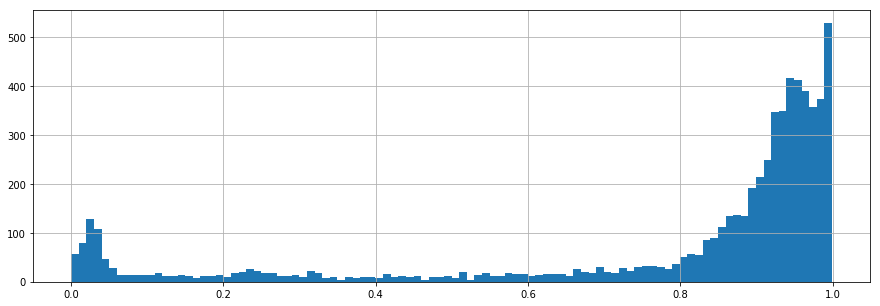

In [23]:
y_proba = [i[0] for i in xgb.predict_proba(X_test)]

plt.figure(figsize=(15,5))
pd.Series(y_proba).hist(bins=100)
plt.show()


In [24]:
y_proba = [i[0] for i in xgb.predict_proba(X_test)]

for t in [0.4, 0.45, 0.5, 0.55, 0.6]:
    print('Threshold=', t)
    y_binary = [int(i<t) for i in y_proba]
    
    print(confusion_matrix(y_test, y_binary),
         '\n',
         classification_report(y_test, y_binary))
    
    

Threshold= 0.4
[[4897   28]
 [ 481  874]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4925
           1       0.97      0.65      0.77      1355

    accuracy                           0.92      6280
   macro avg       0.94      0.82      0.86      6280
weighted avg       0.92      0.92      0.91      6280

Threshold= 0.45
[[4884   41]
 [ 439  916]] 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4925
           1       0.96      0.68      0.79      1355

    accuracy                           0.92      6280
   macro avg       0.94      0.83      0.87      6280
weighted avg       0.93      0.92      0.92      6280

Threshold= 0.5
[[4865   60]
 [ 411  944]] 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4925
           1       0.94      0.70      0.80      1355

    accuracy                           0.93      

In [25]:

result = pd.DataFrame()
result['actual'] = y_test
result['binary'] = xgb.predict(X_test)
result['score']  = [i[0] for i in xgb.predict_proba(X_test)]

result.head()

,actual,binary,score
26144,1,1,0.043156
14768,0,0,0.941483
16757,1,1,0.401589
30517,0,0,0.948827
7810,0,0,0.749429


#### Check improvement introducing Manual Reviews

In [26]:

print('With respect to Binary\n',
      confusion_matrix(result['actual'], result['binary']),
     '\n',
     classification_report(result['actual'], result['binary']))

print('\n\n', '*'*100, '\nFinding best threshold')
for i in [0.3, 0.4, 0.5, 0.6, 0.7]:
    print('Threshold =', i)
    a = result[result['score']<i]
    b = result[result['score']>i+0.2]
    result_select = pd.concat([a,b])
    
#result_select = result.query('score<0.3 or score>0.5')
    print('Manual review = ',len(result)-len(result_select))


    print('With respect to Score\n',
          confusion_matrix(result_select['actual'], result_select['binary']),
         '\n',
         classification_report(result_select['actual'], result_select['binary']))


With respect to Binary
 [[4865   60]
 [ 411  944]] 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4925
           1       0.94      0.70      0.80      1355

    accuracy                           0.93      6280
   macro avg       0.93      0.84      0.88      6280
weighted avg       0.93      0.93      0.92      6280



 **************************************************************************************************** 
Finding best threshold
Threshold = 0.3
Manual review =  210
With respect to Score
 [[4865   12]
 [ 411  782]] 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      4877
           1       0.98      0.66      0.79      1193

    accuracy                           0.93      6070
   macro avg       0.95      0.83      0.87      6070
weighted avg       0.93      0.93      0.92      6070

Threshold = 0.4
Manual review =  238
With respect to Score
 [[4770   28]
 [ 